In [1]:
#import all the required libraries
import pandas as pd

In [2]:
#load data sets
df_cust = pd.read_csv('..\Data\Customer.csv')
print(df_cust.shape)

(1723, 14)


### a. Let's find missing values

In [3]:
# missing values
missing_val = df_cust.isnull().sum()

print("Missings values\n",missing_val)
#there is no missing value in the data set
print("\nThere are no missing values in the data set")

Missings values
 month                  0
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64

There are no missing values in the data set


#### b. Drop any duplicate values

In [4]:
#drop any duplicate rows in the dataset
#lets find duplicate rows in dataset
duplicate_row_count = df_cust.duplicated().sum()
print("Total no of duplicate rows ",duplicate_row_count)


Total no of duplicate rows  0


#### c. Find the outliers in the numeric columns

In [5]:
#numeric column 'credit_amount', 'credit_term', 'age', 'income', 

# import seaborn as sns
# sns.boxplot(x=df_cust['credit_amount'])
# sns.boxplot(x=df_cust['credit_term'])
# sns.boxplot(x=df_cust['age'])
# sns.boxplot(x=df_cust['income'])

#find the count of outliers
from scipy.stats import zscore
z_scores = zscore(df_cust['credit_amount'])
outliers = (abs(z_scores) > 3)
print("Count of outliers in credit amount",outliers.sum())

z_scores = zscore(df_cust['credit_term'])
outliers = (abs(z_scores) > 3)
print("Count of outliers in credit term",outliers.sum())

z_scores = zscore(df_cust['age'])
outliers = (abs(z_scores) > 3)
print("Count of outliers in age",outliers.sum())

z_scores = zscore(df_cust['income'])
outliers = (abs(z_scores) > 3)
print("Count of outliers in income",outliers.sum())

# the percentage of outliers are very less 2.2%, we can leave it as it 

print("the percentage of outliers are very less 2.2%, we can leave it as it")


Count of outliers in credit amount 39
Count of outliers in credit term 39
Count of outliers in age 14
Count of outliers in income 31
the percentage of outliers are very less 2.2%, we can leave it as it


#### d. Normalize the data

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a MinMaxScaler instance
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_normalized = scaler.fit_transform(df_cust[['credit_amount', 'credit_term', 'age', 'income']])

# df_normalized = pd.DataFrame(df_normalized)
# df_normalized.head()

df_cleaned = df_cust.copy()

df_cleaned[['credit_amount', 'credit_term', 'age', 'income']] = df_normalized

df_cleaned.head()


,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,-0.797483,0.069240,0.235447,male,Secondary special education,Cell phones,0,2,-0.557339,Another,0,0,0
1,1,-0.367663,-0.847286,-1.213122,male,Secondary special education,Household appliances,1,2,-0.748661,Another,3,1,0
2,1,-0.009479,0.069240,-0.984400,female,Secondary special education,Household appliances,0,2,-0.079033,Another,2,0,0
3,1,-0.690028,0.069240,-0.450717,male,Secondary special education,Cell phones,1,2,-0.079033,Unmarried,3,1,0
4,1,-0.528845,0.069240,-0.831919,female,Higher education,Cell phones,0,2,-0.318186,Married,0,1,0


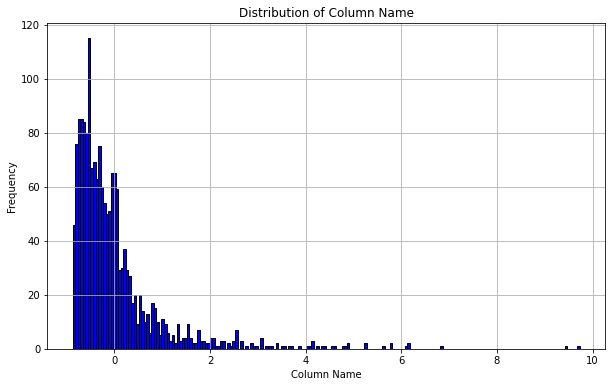

In [7]:
# Plotting the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df_cleaned['credit_amount'].hist(bins=200, color='blue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Column Name')
plt.xlabel('Column Name')
plt.ylabel('Frequency')
plt.show()

#### e. Correct the datatype 

In [8]:
df_cleaned.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,-0.797483,0.069240,0.235447,male,Secondary special education,Cell phones,0,2,-0.557339,Another,0,0,0
1,1,-0.367663,-0.847286,-1.213122,male,Secondary special education,Household appliances,1,2,-0.748661,Another,3,1,0
2,1,-0.009479,0.069240,-0.984400,female,Secondary special education,Household appliances,0,2,-0.079033,Another,2,0,0
3,1,-0.690028,0.069240,-0.450717,male,Secondary special education,Cell phones,1,2,-0.079033,Unmarried,3,1,0
4,1,-0.528845,0.069240,-0.831919,female,Higher education,Cell phones,0,2,-0.318186,Married,0,1,0


In [9]:
# lets find the data types of each column
# Get the data types of all columns
d_types = df_cleaned.dtypes
# print(d_types)
df_cleaned[["sex","education","product_type","having_children_flg","region","month","family_status","phone_operator","is_client","bad_client_target"]] = df_cleaned[["sex","education","product_type","having_children_flg","region","month","family_status","phone_operator","is_client","bad_client_target"]].astype('category')
d_types = df_cleaned.dtypes
print(d_types)

month                  category
credit_amount           float64
credit_term             float64
age                     float64
sex                    category
education              category
product_type           category
having_children_flg    category
region                 category
income                  float64
family_status          category
phone_operator         category
is_client              category
bad_client_target      category
dtype: object


In [10]:
# df_cleaned.head()

# Write DataFrame to CSV file
df_cleaned.to_csv('..\Data\customer_cleaned.csv', index=False)